In [1]:
import numpy as np
import matplotlib.pyplot as plt
from genetic_one import Gen1

## Setting up an optimization routine

In order to build genetic training, first required to define the target fitness function "fit_function(x)" that has as an input the vector of parameters that need to be optimized and return a scalar "foat". Also the hyperparameters and boundary conditions for eatch parameters need to be predefine.

Hyperparameters of the base model called "Gen " are:

<ol>
   
  **Parameters for the initialization of the first generation:**
  <li>cell_split_number</li>
  <li>subjects_in_cell</li>
  **Mutation parameters:**
  <li>nr_clones</li>
  <li>mutation_gaussian_sd</li>
  **Crossover parameters**
  <li>pins</li>
  <li>gene_quality</li>
    
</ol>

In [2]:
# Fitness function 
def fit_function(x):
    x=x[0]
    return x*x+3*x-5+np.sqrt(np.sqrt(x**2))+5*np.sin(x-5)*2*x
def rgb_from_x(x):
    return (np.sqrt((1-(fit_function(x)/max_Y)*(fit_function(x)/max_Y))**2),0.5, (fit_function(x)/max_Y)*(fit_function(x)/max_Y))

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 10, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
a = 50
input_size = 1 # since our function has one variable this is a trivial scenario.
bounds =[[-a,a]] # searching intervals for the solution

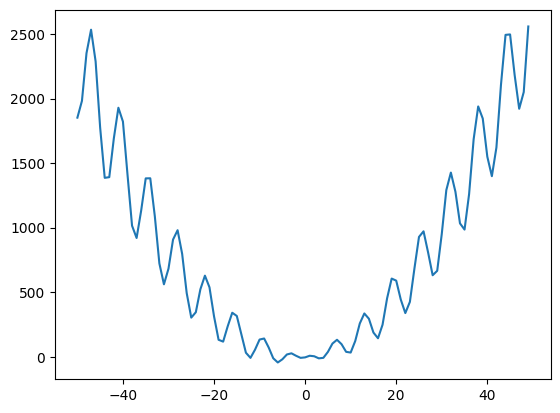

In [3]:
# Plot the function 
X =[i for i in range(-a,a)]
Y =[fit_function([x]) for x in X]
max_Y=max(Y)
plt.plot(X,Y)

In [4]:
# Build the model:
experiment = Gen1(fit_function ,input_size, bounds, model_par)

#         Base class for genetic algorithm,
#         this  example is constrained to optimize over integers.
#         :param fitness_function: The function of which the minimum value needs to be found. .
#         :param input_size::int Number of variables of the fitness function.
#         :param input_ranges:[[int, int]...] Boundaries for each parameter of the fitness_function
#         :param model_par:{} A python dictionary that contains the hyper-parameters of the experiment.


## Train a model 

The next step in finding the optimal solution is to evolve the model. The evolving routine requires, as an extra parameter, the number of generations over with the system will evolve.

In [5]:
## Automate evolution

nr_epochs = 5

last_generation = experiment.evolve(nr_epochs)


#         This function evolves the experiment until the nr of evolution [nr_epochs]
#         is reached or until a specific condition is fulfilled.
#         it returns the last generation.

#         :param nr_epochs: int
#         :param condition: function with a boolean output
#         :param initial_generation:: [[int, int ,...],[int,..]] or 0 if no generation is provided
#         :param history: bool if true the experiment history is return.
#         :return: [[int, int ,...],[int,..]]



Epochs 0/5
Evolution process ended!
Last generation: [[6], [12], [-18], [-18], [-18], [17], [-13], [-13], [-13], [-43], [-43], [-43], [-43], [-43], [-43]]
Epochs 1/5
Evolution process ended!
Last generation: [[-13], [-24], [-16], [-7], [-7], [-36], [-27], [-18], [-18], [-18], [-10], [-10], [-1], [-1], [-1]]
Epochs 2/5
Evolution process ended!
Last generation: [[-7], [-6], [-12], [-10], [-10], [-6], [-12], [-10], [-10], [-18], [-16], [-16], [-13], [-13], [-13]]
Epochs 3/5
Evolution process ended!
Last generation: [[-5], [-5], [-6], [-6], [-6], [-5], [-6], [-6], [-6], [-7], [-7], [-7], [-7], [-7], [-7]]
Epochs 4/5
Evolution process ended!
Last generation: [[-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6]]


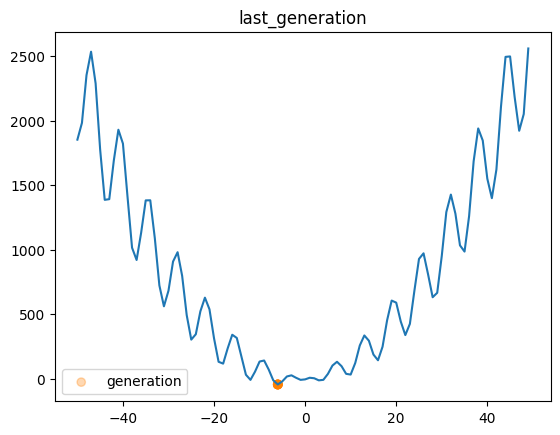

In [6]:

# Just a plot of the last generation 
fit = [fit_function(x) for x in last_generation] 
plt.scatter(last_generation, fit , c=[rgb_from_x(x) for x in last_generation], label='generation', alpha=0.3)
plt.plot(X,Y)
plt.title("last_generation")
plt.legend()

## Step by step evolution 

The "Gen1" contains a series of subroutines that can be inherent or switched to other versions to fit the task better. In the following, the key subroutines are presented

In [7]:
experiment = Gen1(fit_function ,input_size, bounds, model_par)

**.first generation()** will generate a random generation of possible solutions using the the Latin Hypercube strategy with the model hyper parameters 'cell_split_number' and ''subjects_in_cell' .

In [8]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0

#         This function will generate a random generation of possible solutions based on the model hyper parameters
#         :return::[[int, int ,...],[int,..]]

gen_0 [[-44], [-35], [-23], [-15], [-10], [10], [19], [30], [32], [47]]


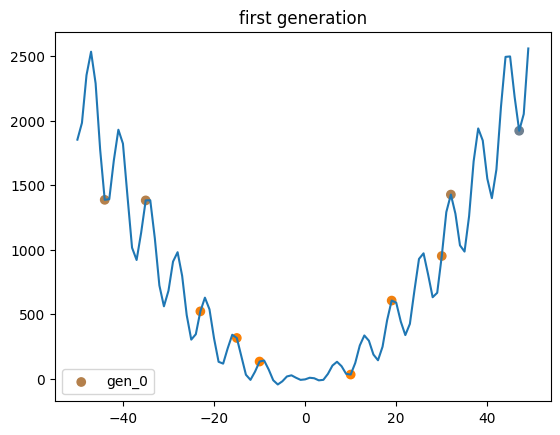

In [9]:
print("gen_0", gen_0)
plt.scatter(gen_0,[fit_function(x) for x in gen_0] , c=[rgb_from_x(x) for x in gen_0], label='gen_0')
plt.plot(X,Y)
plt.title("first generation")
plt.legend()

**.mitosis():**will clone the individuals from a generation and add a mutation according to the predefined
        hyper parameter "mutation_gaussian_sd".

In [10]:
# mutation_1 

clone_family = experiment.mitosis()
print("clone_family:",clone_family)


clone_family: [[[-44], [-41], [-47], [-42], [-49], [-38]], [[-35], [-36], [-35], [-38], [-35], [-36]], [[-23], [-28], [-25], [-22], [-21], [-23]], [[-15], [-12], [-14], [-8], [-12], [-17]], [[-10], [-13], [-7], [-11], [-14], [-1]], [[10], [17], [11], [17], [12], [3]], [[19], [18], [21], [19], [14], [14]], [[30], [26], [21], [27], [32], [25]], [[32], [30], [35], [31], [36], [35]], [[47], [47], [43], [47], [42], [45]]]


c_dist: [[-44], [-41], [-47], [-42], [-49], [-38], [-35], [-36], [-35], [-38], [-35], [-36], [-23], [-28], [-25], [-22], [-21], [-23], [-15], [-12], [-14], [-8], [-12], [-17], [-10], [-13], [-7], [-11], [-14], [-1], [10], [17], [11], [17], [12], [3], [19], [18], [21], [19], [14], [14], [30], [26], [21], [27], [32], [25], [32], [30], [35], [31], [36], [35], [47], [47], [43], [47], [42], [45]]


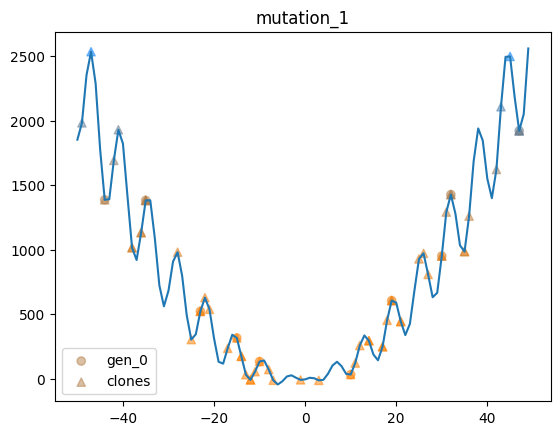

In [11]:
c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(gen_0,[fit_function(x) for x in gen_0] , c=[rgb_from_x(x) for x in gen_0], label='gen_0', alpha=0.5)
plt.scatter(c_dist,[fit_function(x) for x in c_dist] , c=[rgb_from_x(x) for x in c_dist],marker ='^', label='clones', alpha=0.5)
plt.plot(X,Y)
plt.title("mutation_1")
plt.legend()

**.kill(family_generation)** will keep only the best from each family and will return
survivors and the performance of them.

In [12]:
# kill_1

# Keep the best from each family and kill the underperformer.
generation,performances = experiment.kill(clone_family)
print("generation:",generation)

#         Surviving of the fittest, this function kill will keep only the best from each family and will return
#         survivors and the performance of them.
#         :param family_generation:: [[[int,int,..],[int,int,..]..]...] generated in th mitosis step
#         :return:: [[int, int ,...],[int,..]], [float, float...]

generation: [[-38], [-38], [-25], [-12], [-7], [3], [14], [21], [30], [42]]


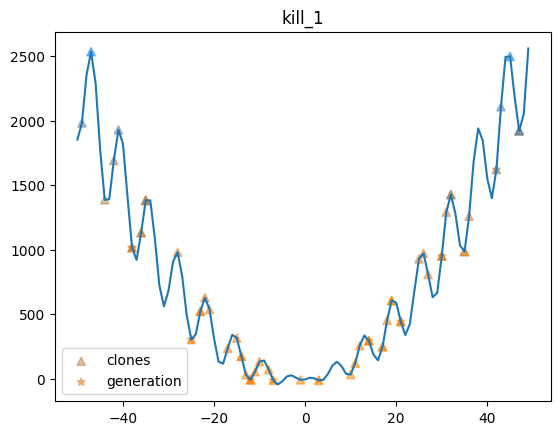

In [13]:
alt_performance= [-p for p in performances]

plt.title("kill_1")
plt.scatter(c_dist,[fit_function(x) for x in c_dist] , c=[rgb_from_x(x) for x in c_dist],marker ='^', label='clones', alpha=0.5)
plt.scatter(generation, alt_performance , c=[rgb_from_x(x) for x in generation],marker ='*', label='generation', alpha=0.5)
plt.plot(X,Y)
plt.legend()

**.reproduction(,generation, performances)** mixed the solutions in order to give birth to new possible solutions.
        It requires as an input an old generation, and the output will be a new generation made by mixing the previous
        solutions. Hyper parameters that affect this function are 'pins' and 'gene_quality'.


In [14]:
# reproduction_1

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

#        This function mixed the solutions in order to give birth to new possible solutions.
#         It requires as an input an old generation, and the output will be a new generation made by mixing the previous
#         solutions. Hyper parameters that affect this function are 'pins' and 'gene_quality'.

#         :param generation:: [[int, int ,...],[int,..]]
#         :param performances:: [float, float...]
#         :return::[[int, int ,...],[int,..]]


new genration: [[14], [14], [-12], [-12], [-12], [14], [-12], [-12], [-12], [-38], [-38], [-38], [-38], [-38], [-38]]


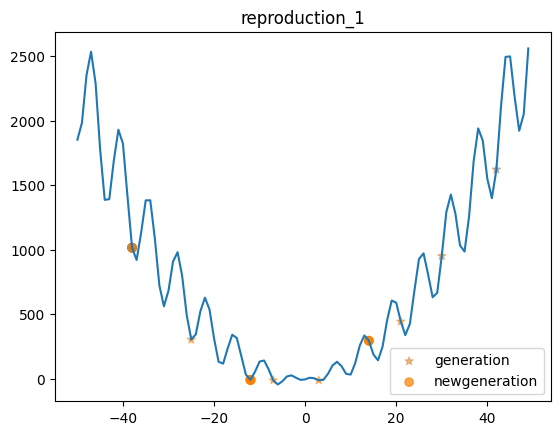

In [15]:
plt.scatter(generation, alt_performance , label='generation', c=[rgb_from_x(x) for x in generation],marker ='*',  alpha=0.5)
plt.scatter(new_generation, [fit_function(x)for x in new_generation] , c=[rgb_from_x(x) for x in new_generation], label='newgeneration', alpha=0.7)
plt.plot(X,Y)
plt.title("reproduction_1")
plt.legend()

####  some more step by step evolutions

clone_family: [[[14], [9], [11], [15], [13], [18]], [[14], [10], [13], [19], [10], [12]], [[-12], [-9], [-13], [-13], [-14], [-13]], [[-12], [-13], [-10], [-15], [-7], [-12]], [[-12], [-13], [-15], [-16], [-7], [-11]], [[14], [19], [15], [8], [14], [6]], [[-12], [-5], [-6], [-7], [-7], [-13]], [[-12], [-13], [-20], [-11], [-17], [-13]], [[-12], [-11], [-9], [-14], [-13], [-5]], [[-38], [-44], [-37], [-43], [-38], [-38]], [[-38], [-36], [-33], [-35], [-36], [-29]], [[-38], [-37], [-33], [-36], [-36], [-44]], [[-38], [-48], [-36], [-34], [-34], [-42]], [[-38], [-34], [-42], [-43], [-41], [-40]], [[-38], [-36], [-41], [-37], [-37], [-39]]]
c_dist: [[14], [9], [11], [15], [13], [18], [14], [10], [13], [19], [10], [12], [-12], [-9], [-13], [-13], [-14], [-13], [-12], [-13], [-10], [-15], [-7], [-12], [-12], [-13], [-15], [-16], [-7], [-11], [14], [19], [15], [8], [14], [6], [-12], [-5], [-6], [-7], [-7], [-13], [-12], [-13], [-20], [-11], [-17], [-13], [-12], [-11], [-9], [-14], [-13], [-5]

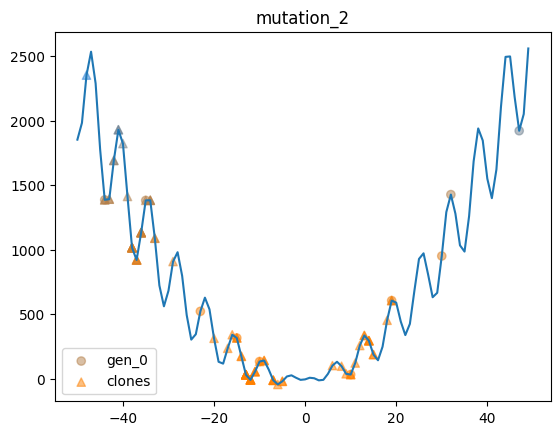

In [16]:
# mutation_2

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(gen_0,[fit_function(x) for x in gen_0] , c=[rgb_from_x(x) for x in gen_0], label='gen_0', alpha=0.5)
plt.scatter(c_dist,[fit_function(x) for x in c_dist] , c=[rgb_from_x(x) for x in c_dist],marker ='^', label='clones', alpha=0.5)
plt.plot(X,Y)
plt.title("mutation_2")
plt.legend()

generation: [[9], [10], [-12], [-7], [-7], [8], [-6], [-12], [-5], [-37], [-29], [-37], [-38], [-38], [-37]]


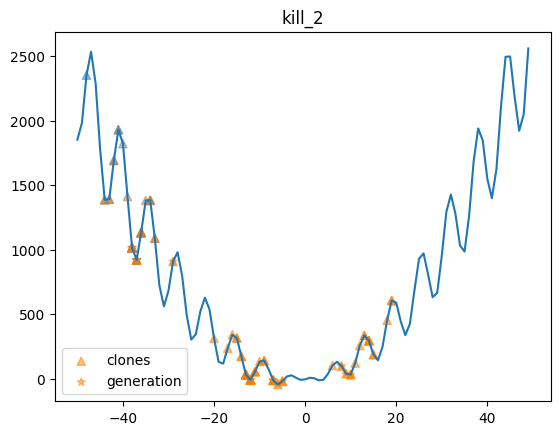

In [17]:
# kill_2

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[fit_function(x) for x in c_dist] , c=[rgb_from_x(x) for x in c_dist],marker ='^', label='clones', alpha=0.5)
plt.scatter(generation, alt_performance , c=[rgb_from_x(x) for x in generation],marker ='*', label='generation', alpha=0.5)
plt.plot(X,Y)
plt.title("kill_2")
plt.legend()

new genration: [[-12], [-12], [-2], [-2], [-2], [-12], [-2], [-2], [-2], [9], [9], [9], [9], [9], [9]]


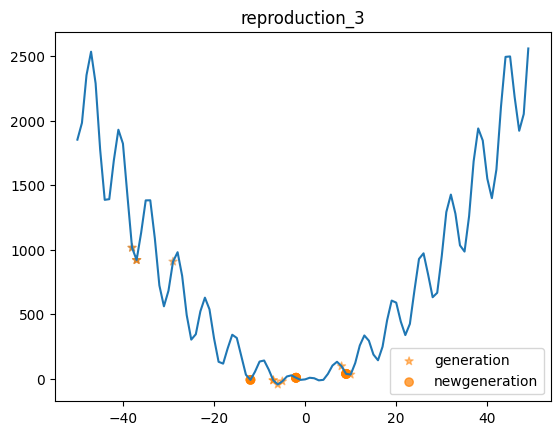

In [18]:
# reproduction_3

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , label='generation', c=[rgb_from_x(x) for x in generation],marker ='*',  alpha=0.5)
plt.scatter(new_generation, [fit_function(x)for x in new_generation] , c=[rgb_from_x(x) for x in new_generation], label='newgeneration', alpha=0.7)
plt.plot(X,Y)
plt.title("reproduction_3")
plt.legend()

clone_family: [[[-12], [-14], [-8], [-11], [-14], [-11]], [[-12], [-9], [-13], [-12], [-17], [-12]], [[-2], [-4], [-5], [3], [-5], [0]], [[-2], [-6], [-4], [-12], [0], [-7]], [[-2], [2], [-6], [-3], [3], [3]], [[-12], [-15], [-14], [-11], [-18], [-14]], [[-2], [-2], [-2], [-4], [-11], [0]], [[-2], [-5], [-7], [-7], [-1], [-9]], [[-2], [4], [5], [-2], [1], [9]], [[9], [13], [10], [13], [9], [3]], [[9], [5], [12], [4], [8], [19]], [[9], [11], [8], [7], [6], [9]], [[9], [8], [5], [13], [13], [21]], [[9], [10], [6], [7], [13], [6]], [[9], [12], [9], [9], [14], [-3]]]
c_dist: [[-12], [-14], [-8], [-11], [-14], [-11], [-12], [-9], [-13], [-12], [-17], [-12], [-2], [-4], [-5], [3], [-5], [0], [-2], [-6], [-4], [-12], [0], [-7], [-2], [2], [-6], [-3], [3], [3], [-12], [-15], [-14], [-11], [-18], [-14], [-2], [-2], [-2], [-4], [-11], [0], [-2], [-5], [-7], [-7], [-1], [-9], [-2], [4], [5], [-2], [1], [9], [9], [13], [10], [13], [9], [3], [9], [5], [12], [4], [8], [19], [9], [11], [8], [7], [6],

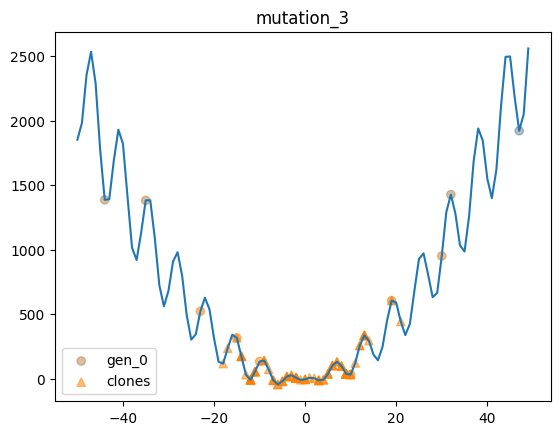

In [19]:
# mutation_3

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(gen_0,[fit_function(x) for x in gen_0] , c=[rgb_from_x(x) for x in gen_0], label='gen_0', alpha=0.5)
plt.scatter(c_dist,[fit_function(x) for x in c_dist] , c=[rgb_from_x(x) for x in c_dist],marker ='^', label='clones', alpha=0.5)
plt.plot(X,Y)
plt.title("mutation_3")
plt.legend()

generation: [[-12], [-12], [-5], [-6], [-6], [-12], [0], [-5], [4], [3], [4], [9], [5], [10], [-3]]


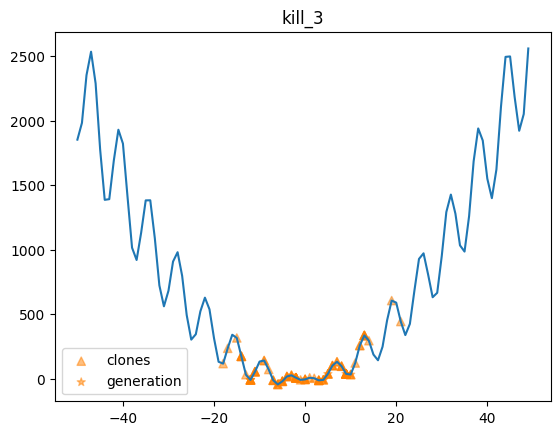

In [20]:
# kill_3

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[fit_function(x) for x in c_dist] , c=[rgb_from_x(x) for x in c_dist],marker ='^', label='clones', alpha=0.5)
plt.scatter(generation, alt_performance , c=[rgb_from_x(x) for x in generation],marker ='*', label='generation', alpha=0.5)
plt.plot(X,Y)
plt.title("kill_3")
plt.legend()

new genration: [[-5], [0], [-8], [-8], [-8], [4], [-4], [-4], [-4], [-12], [-12], [-12], [-12], [-12], [-12]]


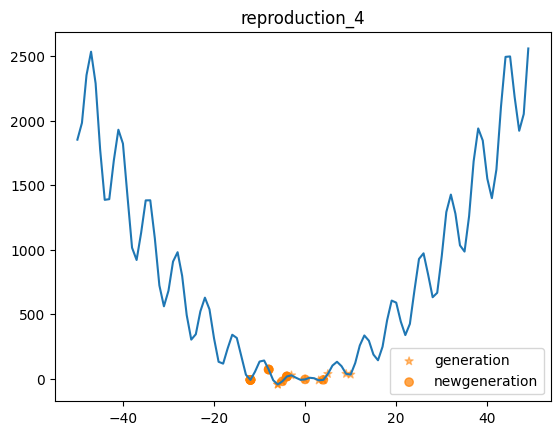

In [21]:
# reproduction_4
new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , label='generation', c=[rgb_from_x(x) for x in generation],marker ='*',  alpha=0.5)
plt.scatter(new_generation, [fit_function(x)for x in new_generation] , c=[rgb_from_x(x) for x in new_generation], label='newgeneration', alpha=0.7)
plt.plot(X,Y)
plt.title("reproduction_4")
plt.legend()